In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
cm = 1/2.54
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['figure.figsize'] = (2.5*cm,2.5*cm)
plt.rcParams["font.family"] = "Arial"

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = truncate_colormap(plt.get_cmap('inferno'), 0.1, 0.9)

In [3]:
samples = [f'control_{i}' for i in range(1,5)] + [f'4030_{i}' for i in range(1,3)] + [f'4032_{i}' for i in range(1,5)]

In [4]:
control_samples = [f'control_{i}' for i in [1,2,3,4]]

treated_samples = [f'4032_{i}' for i in [1,2,3,4]] + [f'4030_{i}' for i in [1,2]]

In [5]:
offsets = pd.read_csv('../topact-data/kidney-stereoseq/offsets.csv')

In [6]:
xmins = {row.sample: row.xmin for row in offsets.itertuples()}
ymins = {row.sample: row.ymin for row in offsets.itertuples()}

In [7]:
def loadlandscape(sample, x, y):
    return np.load(f'../topact-data/kidney-stereoseq/landscapes/{sample}-x={x - xmins[sample]}-y={y - ymins[sample]}.npy')

In [10]:
def get_glom_landscapes(sample):
    gloms = np.loadtxt(f'../topact-data/kidney-stereoseq/bin20-gloms/{sample}_gloms.txt', dtype='int')
    return [loadlandscape(sample, glom[0], glom[1]) for glom in gloms]

def get_nonglom_landscapes(sample):
    nongloms = np.loadtxt(f'../topact-data/kidney-stereoseq/nonglom-patches/{sample}_nongloms.txt', dtype='int')
    return [loadlandscape(sample, nonglom[0], nonglom[1]) for nonglom in nongloms]

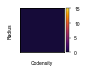

In [24]:
ttd = get_glom_landscapes('control_4')
for i in [5]:
    
    ls = ttd[i]
    
    fig, ax = plt.subplots()



    img = ax.imshow(np.rot90(ls[0].T), vmax=15, cmap=cmap, origin='lower')

    cbar = fig.colorbar(img, ax=ax, orientation="vertical", location='right', shrink=0.82)
    cbar.ax.tick_params(labelsize=5, width=1*cm, length=2)
    cbar.outline.set_linewidth(1*cm)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Codensity', fontsize=5)
    plt.ylabel('Radius', fontsize=5)


    plt.savefig(f'./control_4_ls{i}.pdf', bbox_inches='tight')

    plt.show()

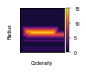

In [25]:
trtd = get_glom_landscapes('4032_1')

for i in [9]:
    
    ls = trtd[i]
    
    fig, ax = plt.subplots()



    img = ax.imshow(np.rot90(ls[0].T), vmax=15, cmap=cmap, origin='lower')

    cbar = fig.colorbar(img, ax=ax, orientation="vertical", location='right', shrink=0.82)
    cbar.ax.tick_params(labelsize=5, width=1*cm, length=2)
    cbar.outline.set_linewidth(1*cm)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Codensity', fontsize=5)
    plt.ylabel('Radius', fontsize=5)


    plt.savefig(f'./4032_1_ls{i}.pdf', bbox_inches='tight')

    plt.show()

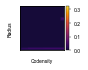

In [26]:
control_landscapes = sum((get_glom_landscapes(sample) for sample in control_samples), [])

control_average = sum(control_landscapes) / len(control_landscapes)

fig, ax = plt.subplots()

img = ax.imshow(np.rot90(control_average[0].T), vmax=0.32, cmap=cmap, origin='lower')

cbar = fig.colorbar(img, ax=ax, orientation="vertical", location='right', shrink=0.82)
cbar.ax.tick_params(labelsize=5, width=1*cm, length=2)
cbar.outline.set_linewidth(1*cm)
plt.xticks([])
plt.yticks([])
plt.xlabel('Codensity', fontsize=5)
plt.ylabel('Radius', fontsize=5)

plt.savefig('./control_average.pdf', bbox_inches='tight')

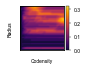

In [27]:
treated_landscapes = sum((get_glom_landscapes(sample) for sample in treated_samples), [])

treated_average = sum(treated_landscapes) / len(treated_landscapes)

fig, ax = plt.subplots()



img = ax.imshow(np.rot90(treated_average[0].T), vmax=0.32, cmap=cmap, origin='lower')

cbar = fig.colorbar(img, ax=ax, orientation="vertical", location='right', shrink=0.82)
cbar.ax.tick_params(labelsize=5, width=1*cm, length=2)
cbar.outline.set_linewidth(1*cm)
plt.xticks([])
plt.yticks([])
plt.xlabel('Codensity', fontsize=5)
plt.ylabel('Radius', fontsize=5)

plt.savefig('./treated_average.pdf', bbox_inches='tight')